<a href="https://colab.research.google.com/github/sathvik-ujwal/Lab-Codes/blob/main/MACHINE%20LEARNING/Codes/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [62]:
fruits = [
    {'id': 1, 'weight': 180, 'sweetness': 7, 'label': 'Apple'},
    {'id': 2, 'weight': 200, 'sweetness': 6, 'label': 'Apple'},
    {'id': 3, 'weight': 150, 'sweetness': 4, 'label': 'Orange'},
    {'id': 4, 'weight': 170, 'sweetness': 5, 'label': 'Orange'},
    {'id': 5, 'weight': 160, 'sweetness': 6, 'label': 'Apple'},
    {'id': 6, 'weight': 140, 'sweetness': 3, 'label': 'Orange'}
]

In [64]:
df = pd.DataFrame(fruits)
df = df.drop(columns=['id'])
df

,weight,sweetness,label
0,180,7,Apple
1,200,6,Apple
2,150,4,Orange
3,170,5,Orange
4,160,6,Apple
5,140,3,Orange


In [52]:
def Eucleadian_distance(old, new):
    return np.sqrt(np.sum((old[i]-new[i])**2 for i in range(len(old))))

In [53]:
def Manhattan_distance(old, new):
    return (np.sum(np.abs(old[i]-new[i]) for i in range(len(old))))

In [54]:
def Minkowski(old, new, p):
    return (np.sum((np.abs(old[i]-new[i]))**p for i in range(len(old))))**(1/p)

In [65]:
def knn(new_point, k=3):
    distances = []

    for index, row in df.iterrows():
        features = np.array(row[:-1])

        distance = Eucleadian_distance(features, np.array(new_point))
        distances.append((distance, row[-1]))

    distances.sort(key=lambda x: x[0])
    nearest_neighbours = distances[:k]
    labels = [neighbour[1] for neighbour in nearest_neighbours]
    return max(set(labels), key=labels.count)

In [69]:
new_fruit = [165, 5]
res_label = knn(new_fruit)
print(res_label)

Orange


In [72]:
def plot_data(df, new_fruit):
    feature_cols = df.columns[:-1]

    if len(feature_cols) < 2:
        raise ValueError("Atleast 2 features are required for plotting")

    unique_labels = df['label'].unique()
    colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}

    for label in unique_labels:
        subset = df[df['label'] == label]
        plt.scatter(subset[feature_cols[0]], subset[feature_cols[1]],
                    color=colors[label],
                    label=label,
                    alpha=0.6)

    plt.scatter(new_fruit[feature_cols[0]], new_fruit[feature_cols[1]],
                color='blue',
                label='New Fruit',
                marker="x",
                s=100)

    plt.xlabel(feature_cols[0])
    plt.ylabel(feature_cols[1])
    plt.title("Fruit Classification")
    plt.legend()
    plt.grid()
    plt.show()

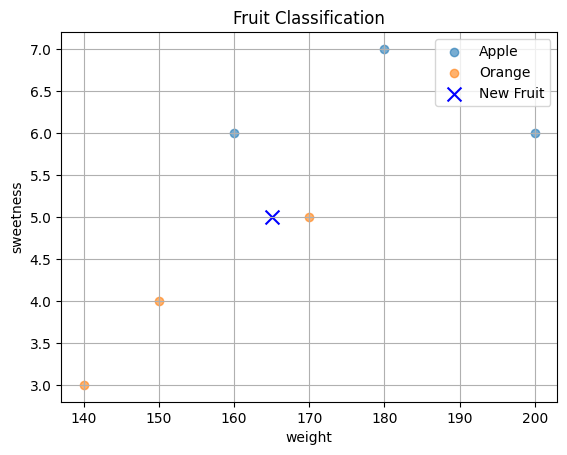

In [74]:
new_fruit = {'weight': 165, 'sweetness': 5}
plot_data(df, new_fruit)